In [0]:
import tensorflow as tf
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [0]:
import pandas as pd
import numpy as np
import io
from scipy.spatial.distance import cosine

In [7]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Job and its description cleaned dataset.
df_skill = pd.read_pickle('drive/My Drive/clean_esco_skill.pkl')
df_skill.head()

,skill_ID,preferredLabel,description,cleaned description
8292,0,3D body scanning technologies,The principles and usage of technologies for 3...,principle usage technology 3d body scanning us...
5890,1,3D lighting,The arrangement or digital effect which simula...,arrangement digital effect simulates lighting ...
8075,2,3D modelling,The process of developing a mathematical repre...,process developing mathematical representation...
2311,3,3D printing process,The process of reproducing 3D objects by using...,process reproducing 3d object using 3d printin...
3334,4,3D texturing,The process of applying a type of surface to a...,process applying type surface 3d image


In [9]:
skill_des = df_skill['cleaned description'].values
skill_des

array(['principle usage technology 3d body scanning used capture size shape human body',
       'arrangement digital effect simulates lighting 3d environment',
       'process developing mathematical representation three-dimensional surface object via specialised software product called 3d model displayed two-dimensional image process called 3d rendering used computer simulation physical phenomenon model also physically created using 3d printing device',
       ...,
       'understand various factor influence effective zoo exhibit design well step towards realising design',
       'national regional international regulation related zoo',
       'zoonosis infectious disease animal naturally transmitted human consist wide range disease range endemic zoonosis brucellosis anthrax bovine tuberculosis parasitic disease hydatid disease echinococcosis trichinellosis rabies emerging zoonosis highly pathogenic avian influenza nipah hendra disease bovine spongiform encephalopathy'],
      dtype=o

In [10]:
print('Total number of skills in ESCO database: ', skill_des.shape[0])

Total number of skills in ESCO database:  13485


In [0]:
encoded_skill_des = []
for sentence in skill_des:
  encoded_skill_des.append(embed([sentence]))

In [0]:
#Array of skill description as vector.
skill_des_arr = np.asarray(encoded_skill_des)

In [13]:
skill_des_arr.shape

(13485, 1, 512)

In [14]:
np.unique(encoded_skill_des[0] == skill_des_arr[0])

array([ True])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


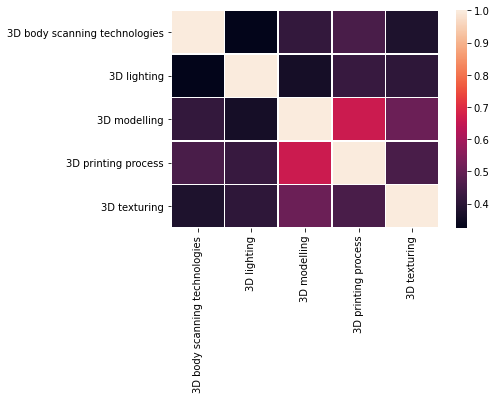

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pylab as plt
d = skill_des_arr[0:5].squeeze(axis=1)
similarity = cosine_similarity(d)
ax = sns.heatmap(similarity, linewidth=0.5, yticklabels=df_skill['preferredLabel'][0:5],
                 xticklabels=df_skill['preferredLabel'][0:5])
plt.show()

In [16]:
# The skill description for the first 5 skills.
df_skill['description'][0:5].values

array(['The principles and usage of technologies for 3D body scanning used to capture the size and shape of the human body.',
       'The arrangement or digital effect which simulates lighting in a 3D environment.',
       'The process of developing a mathematical representation of any three-dimensional surface of an object via specialised software. The product is called a 3D model. It can be displayed as a two-dimensional image through a process called 3D rendering or used in a computer simulation of physical phenomena. The model can also be physically created using 3D printing devices.',
       'The process of reproducing 3D objects by using 3D printing technologies.',
       'The process of applying a type of surface to a 3D image.'],
      dtype=object)

In [17]:
# Skill and its description cleaned dataset.
df_job = pd.read_pickle('drive/My Drive/clean_esco_job.pkl')
df_job.head()

,occupation_ID,preferredLabel,description,mid_description,cleaned description
992,0,3D animator,3D animators are in charge of animating 3D mod...,"[3d, animator, charge, animating, model, objec...",3d animator charge animating model object virt...
2203,1,3D modeller,"3D modellers design 3D models of objects, virt...","[3d, modeller, design, model, object, virtual,...",3d modeller design model object virtual enviro...
918,2,3D printing technician,3D Printing technicians assist in the designin...,"[3d, printing, technician, assist, designing, ...",3d printing technician assist designing progra...
859,3,ATM repair technician,"ATM repair technicians install, diagnose, main...","[atm, repair, technician, install, diagnose, m...",atm repair technician install diagnose maintai...
1678,4,Freinet school teacher,Freinet school teachers educate students using...,"[freinet, school, teacher, educate, student, u...",freinet school teacher educate student using a...


In [18]:
job_des = df_job['cleaned description'].values
job_des

array(['3d animator charge animating model object virtual environment layout character animated agent',
       '3d modeller design model object virtual environment layout character animated agent',
       '3d printing technician assist designing programming product ranging prosthetic miniature may also provide maintenance check render customer run test repair maintain clean printer',
       ...,
       'zoo section leader responsible managing leading team keeper carry daily care management animal well cooperation colleague long term organisation specie exhibit also accountable various aspect staff depending size may additional responsibility appointing budgeting',
       'zookeepers manage animal kept captivity conservation education research displayed public usually responsible feeding daily care welfare part routine clean exhibit report possible health problem may also involved particular scientific conducting guided tour answering question',
       'zoology technician provide techni

In [19]:
print('Total number of jobs in ESCO database: ', job_des.shape[0])

Total number of jobs in ESCO database:  2942


In [0]:
encoded_job_des = []
for sentence in job_des:
  encoded_job_des.append(embed([sentence]))

In [21]:
print(type(encoded_job_des))
print(len(encoded_job_des))
print(encoded_job_des[0].shape)

<class 'list'>
2942
(1, 512)


In [22]:
job_des_arr = np.asarray(encoded_job_des)
print(job_des_arr.shape)

(2942, 1, 512)


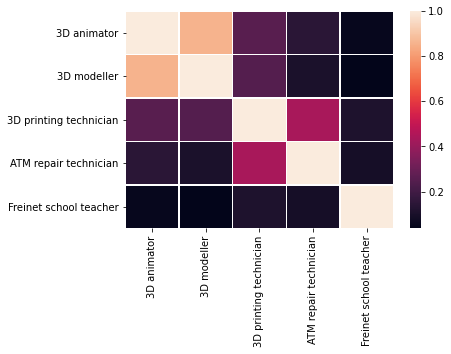

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pylab as plt
c = job_des_arr[0:5].squeeze(axis=1)
job_similarity = cosine_similarity(c)
ax = sns.heatmap(job_similarity, linewidth=0.5, yticklabels=df_job['preferredLabel'][0:5],
                 xticklabels=df_job['preferredLabel'][0:5])
plt.show()

In [0]:
job_des_arr = job_des_arr.squeeze(axis=1)
skill_des_arr = skill_des_arr.squeeze(axis=1)

In [25]:
# Cosine similarity between job and skill description.
job_skill_similarity_matrix = cosine_similarity(job_des_arr, skill_des_arr, dense_output=False)
job_skill_similarity_matrix

array([[ 0.27493984,  0.42456955,  0.4467879 , ...,  0.18166164,
         0.12577596,  0.07130111],
       [ 0.3329512 ,  0.45373595,  0.48673302, ...,  0.2850515 ,
         0.16000673,  0.05192504],
       [ 0.2562403 ,  0.10224476,  0.4230328 , ...,  0.13987097,
        -0.02399375,  0.02121677],
       ...,
       [-0.00509913, -0.06636559, -0.04720121, ...,  0.32300976,
         0.0457207 ,  0.16395505],
       [ 0.01982412, -0.00676913,  0.07690175, ...,  0.266163  ,
         0.11737898,  0.30438542],
       [ 0.21197313,  0.05642768,  0.15936956, ...,  0.24323195,
         0.04461463,  0.23099509]], dtype=float32)

In [26]:
job_skill_similarity_matrix.shape

(2942, 13485)

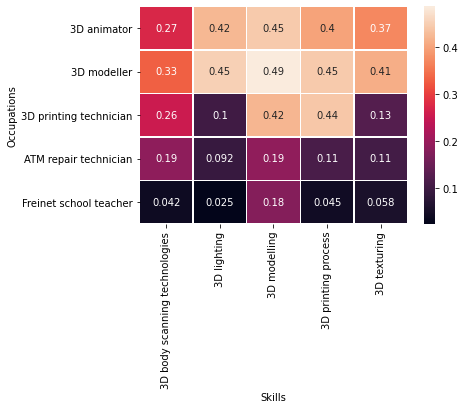

In [27]:
ax = sns.heatmap(job_skill_similarity_matrix[:5,:5], linewidth=0.5, yticklabels=df_job['preferredLabel'][0:5],
                 xticklabels=df_skill['preferredLabel'][0:5], annot=True)
plt.xlabel('Skills')
plt.ylabel('Occupations')
plt.show()

In [0]:
skill_job_complementarity = np.argmax(job_skill_similarity_matrix, axis=1)

In [29]:
skill_job_complementarity

array([ 3021,  2960, 12795, ..., 11736,  1950, 11792])

In [30]:
skill_job_complementarity.shape

(2942,)

In [0]:
df_skill.reset_index(inplace=True)

In [0]:
del df_skill['index']

In [33]:
df_skill.head()

,skill_ID,preferredLabel,description,cleaned description
0,0,3D body scanning technologies,The principles and usage of technologies for 3...,principle usage technology 3d body scanning us...
1,1,3D lighting,The arrangement or digital effect which simula...,arrangement digital effect simulates lighting ...
2,2,3D modelling,The process of developing a mathematical repre...,process developing mathematical representation...
3,3,3D printing process,The process of reproducing 3D objects by using...,process reproducing 3d object using 3d printin...
4,4,3D texturing,The process of applying a type of surface to a...,process applying type surface 3d image


In [34]:
data = pd.DataFrame({'Job': df_job['preferredLabel'], 
                     'Top Skill':df_skill.loc[skill_job_complementarity]['preferredLabel'].values})
data

,Job,Top Skill
992,3D animator,create digital images
2203,3D modeller,create 3D environments
918,3D printing technician,use CAD for soles
859,ATM repair technician,maintain operations of vending machines
1678,Freinet school teacher,apply Freinet teaching strategies
...,...,...
1490,zoo educator,zoo community
2682,zoo registrar,produce reports based on animal records
1179,zoo section leader,supervise well operations
2835,zookeeper,carry out veterinary professional communicatio...


In [35]:
sorted_indices = np.argsort(job_skill_similarity_matrix, axis=1)
sorted_indices 

array([[10031, 11715,  2454, ...,  3052,  3094,  3021],
       [10031, 10503,   999, ...,   918,  2959,  2960],
       [12482,  5564, 12513, ..., 12794, 12793, 12795],
       ...,
       [12600, 12646,   225, ...,  6204,  2658, 11736],
       [ 2312,    32,  4162, ...,  1338,  8032,  1950],
       [11097, 11110,  2189, ..., 10360, 11925, 11792]])

In [36]:
sorted_indices[:, -2]

array([ 3094,  2959, 12793, ...,  2658,  8032, 11925])

In [0]:
data.reset_index(inplace=True, drop=True)

In [0]:
second_best_ind = sorted_indices[:, -2]
data['second_best_skill'] = df_skill.loc[second_best_ind]['preferredLabel'].values
#data

In [0]:
third_best_ind = sorted_indices[:, -3]
data['third_best_skill'] = df_skill.loc[third_best_ind]['preferredLabel'].values

In [0]:
for i in range(-4, -11, -1):
  data[i] = df_skill.loc[sorted_indices[:, i]]['preferredLabel'].values

In [0]:
data.rename(columns={-4: 'fourth_best_skill',
                     -5: 'fifth_best_skill',
                     -6: 'sixth_best_skill',
                     -7: "seventh_best_skill",
                     -8: 'eighth_best_skill',
                     -9: 'ninth_best_skill',
                     -10: 'tenth_best_skill'}, inplace= True)

In [50]:
data.head()

,Job,Top Skill,second_best_skill,third_best_skill,fourth_best_skill,fifth_best_skill,sixth_best_skill,seventh_best_skill,eighth_best_skill,ninth_best_skill,tenth_best_skill
0,3D animator,create digital images,create storyboards,create moving images,create 3D environments,create 3D characters,render 3D images,principles of animation,perform scripted dialogue,particle animation,animate 3D organic forms
1,3D modeller,create 3D environments,create 3D characters,animate 3D organic forms,create storyboards,create digital images,render 3D images,create moving images,apply 3D imaging techniques,use CAD for soles,create set models
2,3D printing technician,use CAD for soles,use CAD for heels,use CAD for lasts,operate testbeds,read engineering drawings,create 3D CAD footwear prototypes,maintain library equipment,operate 2D CAD for footwear pattern engineering,design microelectromechanical systems,assist in ship maintenance
3,ATM repair technician,maintain operations of vending machines,provide advice to technicians,use tools for castings repair,maintain mechanical equipment,maintain vehicle service,repair edge banding machinery,maintain water storage equipment,coordinate automotive repair and maintenance s...,repair slitting machinery,maintain water distribution equipment
4,Freinet school teacher,apply Freinet teaching strategies,Freinet teaching principles,Montessori teaching principles,teach teaching principles,apply Montessori teaching strategies,apply teaching strategies,teach dance,adapt teaching to student's capabilities,advise on lesson plans,provide learning support


In [0]:
data.to_pickle('drive/My Drive/ESCO_JOB_SKILL.pkl')